In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\AAA HEATSTROKE\Processed data\no_scaling_and_binning_tree_based_model.csv")

In [3]:
pd.pandas.set_option('display.max_columns',None)
df

,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,hrv_cvsd,hrv_sdnn,hrv_cvnni,hrv_mean_hr,hrv_min_hr,hrv_max_hr,hrv_std_hr,hrv_total_power,hrv_vlf,hrv_lf,hrv_hf,hrv_lf_hf_ratio,hrv_lfnu,hrv_hfnu,hrv_SD1,hrv_SD2,hrv_SD2SD1,hrv_CSI,hrv_CVI,hrv_CSI_Modified,hrv_mean,hrv_std,hrv_min,hrv_max,hrv_ptp,hrv_sum,hrv_energy,hrv_skewness,hrv_kurtosis,hrv_peaks,hrv_rms,hrv_lineintegral,hrv_n_above_mean,hrv_n_below_mean,hrv_n_sign_changes,hrv_iqr,hrv_iqr_5_95,hrv_pct_5,hrv_pct_95,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,Temperature,Humidity,PMV,PDD,Personal Thermal Assessment,Age,X_axis,Y_axis,Z_axis,experiment_Experiment 1,experiment_Experiment 2,experiment_Experiment 3,experiment_Experiment 4,experiment_Experiment 5,experiment_Experiment 6,experiment_Experiment 7,experiment_Experiment 8,Task_Radio,Task_Reading,Task_Typing,Room Color_Green,Room Color_Orange,Room Color_Red,Thermal sensation_hot,Thermal sensation_neutral,Thermal sensation_slightly warm,Thermal sensation_warm,Gender_F,Gender_M
0,101,831.683168,765.625,1187.5,333.768287,333.768434,78.0,77.227723,91.0,90.099010,0.401317,253.538254,0.304850,77.998815,37.281553,142.222222,20.875105,28327.595170,2371.135187,9785.693839,16170.766140,0.605147,37.700418,62.299582,237.198793,268.886640,1.133592,1.133592,6.008802,1219.230916,831.683168,252.279992,421.875,1609.375,1187.5,84000.000,7.628955e+07,1.262270,1.378903,29.0,869.104186,23343.750,39.0,62.0,0,250.00000,921.8750,531.25000,1453.12500,4.572689,0.999700,0.654199,27,60,0.66,14.3,neutral,20,-40.96875,-21.75000,44.56250,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
1,102,834.558824,765.625,1187.5,333.552878,333.564502,79.0,77.450980,92.0,90.196078,0.399690,253.946200,0.304288,77.756997,37.281553,142.222222,20.914202,28367.494440,2338.746707,9425.326334,16603.421400,0.567674,36.211217,63.788783,237.033856,269.800475,1.138236,1.138236,6.009973,1228.386483,834.558824,252.698300,421.875,1609.375,1187.5,85125.000,7.755518e+07,1.224890,1.268597,29.0,871.977557,23656.250,40.0,62.0,0,261.71875,917.1875,532.03125,1449.21875,4.582562,0.999926,0.657089,27,60,0.66,14.3,neutral,20,-43.34375,-22.78125,41.34375,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
2,102,834.558824,765.625,1187.5,333.552878,333.564502,79.0,77.450980,92.0,90.196078,0.399690,253.946200,0.304288,77.756997,37.281553,142.222222,20.914202,28367.494440,2338.746707,9425.326334,16603.421400,0.567674,36.211217,63.788783,237.033856,269.800475,1.138236,1.138236,6.009973,1228.386483,834.558824,252.698300,421.875,1609.375,1187.5,85125.000,7.755518e+07,1.224890,1.268597,29.0,871.977557,23656.250,40.0,62.0,0,261.71875,917.1875,532.03125,1449.21875,4.582562,0.999926,0.657089,27,60,0.66,14.3,neutral,20,-44.84375,-24.31250,39.62500,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,101,834.467822,765.625,1187.5,334.756609,334.787275,78.0,77.227723,91.0,90.099010,0.401199,255.211101,0.305837,77.822798,37.281553,142.222222,21.006974,28566.019940,2376.921417,9696.115649,16492.982870,0.587893,37.023480,62.976520,237.901163,271.419323,1.140891,1.140891,6.014157,1238.639578,834.467822,253.944537,421.875,1609.375,1187.5,84281.250,7.684326e+07,1.219969,1.228606,29.0,872.252471,23484.375,39.0,62.0,0,265.62500,921.8750,531.25000,1453.12500,4.572286,0.999700,0.656106,27,60,0.66,14.3,neutral,20,-44.03125,-23.68750,40.68750,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
4,101,834.467822,765.625,1187.5,334.756609,334.787275,78.0,77.227723,91.0,90.099010,0.401199,255.211101,0.305837,77.822798,37.281553,142.222222,21.006974,28566.019940,2376.921417,9696.115649,16492.982870,0.587893,37.023480,62.976520,237.901163,271.419323,1.140891,1.140891,6.014157,1238.639578,834.467822,253.944537,421.875,1609.375,1187.5,84281.250,7.684326e+07,1.219969,1.228606,29.0,872.252471,23484.375,39.0,62.0,0,265.62500,921.8750,531.25000,1453.12500,4.572286,0.999700,0.656106,27,60,0.66,14.3,neutral,20,-43.96875,-22.96875,41.09375,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,..

In [4]:
x=df.drop(['Personal Thermal Assessment'],axis=1)   #Features(Removing ID as it is unique for all rows)
y=df['Personal Thermal Assessment']

# Label Encoding

In [5]:
y.value_counts()

neutral          47159
slightly warm    18090
warm              9022
hot               4658
very hot          2285
Name: Personal Thermal Assessment, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
le.classes_

array(['hot', 'neutral', 'slightly warm', 'very hot', 'warm'],
      dtype=object)

In [7]:
y=le.transform(y)
val=pd.DataFrame(y)
val.value_counts()

1    47159
2    18090
4     9022
0     4658
3     2285
dtype: int64

# Train test Split

In [8]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

# Making some necessary function

In [10]:
def confusion_matrix_plot(model):
    y_pred = model.predict(X_test)
    print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
    print()
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(model, X_test, y_test)

This function will plot the confusion matrix

In [11]:
def submission_data_produce(model):
    test= pd.read_csv(r"D:\AAA HEATSTROKE\Processed data\test_data_processed.csv")
    test.drop(['Personal Thermal Assessment'],axis=1,inplace=True)
    predicted_class=model.predict(test)
    df_test=pd.read_csv(r"D:\AAA HEATSTROKE\new data\Test Data\Test Data.csv")
    predicted_class=model.predict(test)
    submission=pd.DataFrame({"subject":df_test['subject'],"datetime":df_test['datetime'],"Personal Thermal Assessment":np.squeeze(predicted_class)})
    submission['Personal Thermal Assessment']= submission['Personal Thermal Assessment'].replace([0,1,2,3,4],['hot', 'neutral', 'slightly warm', 'very hot', 'warm'] )
    return submission   

This function will make the final submission file

In [12]:
from sklearn.model_selection import cross_val_score

def cross_val_scores(model):
    score=cross_val_score(model,X_train, y_train,cv=5)
    return score

This function will print cross validation score

# Model training with XGBOOST( No tuning + NO weight balancing)

In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [117]:
classifier=xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

ACCURACY OF THE MODEL:  0.9988918530679253

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


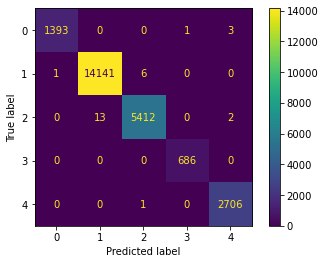

In [118]:
confusion_matrix_plot(classifier)

# Predict the output using classifier( XGBoost with no tuning and weight balancing)

In [16]:
submission_data_produce(classifier)

,subject,datetime,Personal Thermal Assessment
0,Matuo,2021-07-27 05:14:00+00:00,neutral
1,Matuo,2021-07-27 05:14:01+00:00,neutral
2,Matuo,2021-07-27 05:14:02+00:00,neutral
3,Matuo,2021-07-27 05:14:03+00:00,neutral
4,Matuo,2021-07-27 05:14:04+00:00,neutral
...,...,...,...
35692,Yuke,2021-07-28 03:19:54+00:00,warm
35693,Yuke,2021-07-28 03:19:55+00:00,warm
35694,Yuke,2021-07-28 03:19:56+00:00,warm
35695,Yuke,2021-07-28 03:19:57+00:00,warm


In [ ]:
submission=submission_data_produce(classifier).copy()

In [ ]:
submission['Personal Thermal Assessment'].value_counts()

# XGboost with parameter tuning but no class weight (Scoring= Recall as its imbalanced)

In [142]:
params={
 "learning_rate"    : [0.05,1] ,
 "max_depth"        : [ 5,15,20,25],
 "min_child_weight" : [ 1, 3, 5],
 "gamma"            : [0.2,0.4,0.5]  
}

In [143]:
classifier2=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier2,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=3,verbose=3)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,

In [147]:
random_search.best_estimator_ 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
              max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [148]:
random_search.best_params_ 

{'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 1, 'gamma': 0.5}

ACCURACY OF THE MODEL:  0.998481428278268

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


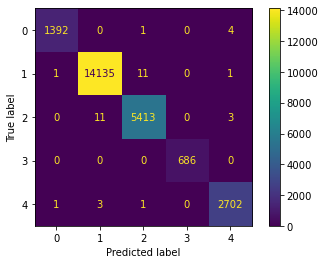

In [149]:
confusion_matrix_plot(random_search)

In [150]:
submission_data_produce(random_search)

,subject,datetime,Personal Thermal Assessment
0,Matuo,2021-07-27 05:14:00+00:00,neutral
1,Matuo,2021-07-27 05:14:01+00:00,neutral
2,Matuo,2021-07-27 05:14:02+00:00,neutral
3,Matuo,2021-07-27 05:14:03+00:00,neutral
4,Matuo,2021-07-27 05:14:04+00:00,neutral
...,...,...,...
35692,Yuke,2021-07-28 03:19:54+00:00,slightly warm
35693,Yuke,2021-07-28 03:19:55+00:00,slightly warm
35694,Yuke,2021-07-28 03:19:56+00:00,neutral
35695,Yuke,2021-07-28 03:19:57+00:00,slightly warm


Previous model was working better

# Try working with putting some additional weight

In [33]:
val.value_counts()

1    47159
2    18090
4     9022
0     4658
3     2285
dtype: int64

In [131]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
class_weights

array([3.4865992 , 0.34442459, 0.8978757 , 7.11056911, 1.80044339])

In [132]:
#class_weights = {0: 3.48, 1: 0.34, 2:0.89, 3:7.11, 4:1.8}
#pos_weight = sum(class_weights.values()) / sum(class_weights.keys())

In [139]:
classifier2=xgboost.XGBClassifier(class_weight=class_weights,max_depth=25)
classifier2.fit(X_train, y_train)

[20:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight={0: 3.48, 1: 0.34, 2: 0.89, 3: 7.11, 4: 1.8},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=25, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, ...)

ACCURACY OF THE MODEL:  0.9989739380258568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


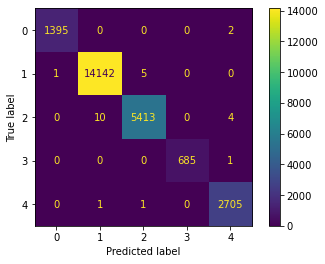

In [140]:
confusion_matrix_plot(classifier2)

In [21]:
submission_data_produce(classifier2)

,subject,datetime,Personal Thermal Assessment
0,Matuo,2021-07-27 05:14:00+00:00,neutral
1,Matuo,2021-07-27 05:14:01+00:00,neutral
2,Matuo,2021-07-27 05:14:02+00:00,neutral
3,Matuo,2021-07-27 05:14:03+00:00,neutral
4,Matuo,2021-07-27 05:14:04+00:00,neutral
...,...,...,...
35692,Yuke,2021-07-28 03:19:54+00:00,warm
35693,Yuke,2021-07-28 03:19:55+00:00,warm
35694,Yuke,2021-07-28 03:19:56+00:00,warm
35695,Yuke,2021-07-28 03:19:57+00:00,warm


In [ ]:
submission_data_produce(random_search)

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
classifier3=RandomForestClassifier(class_weight='balanced')
classifier3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

ACCURACY OF THE MODEL:  0.9990970654627539

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


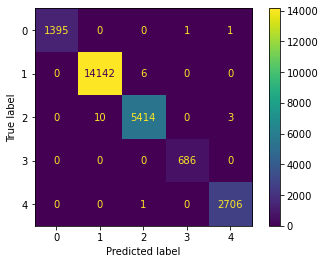

In [120]:
confusion_matrix_plot(classifier3)

In [ ]:
['hot', 'neutral', 'slightly warm', 'very hot', 'warm']

In [66]:
rf=submission_data_produce(classifier3)

In [67]:
rf['Personal Thermal Assessment'].value_counts()

neutral          27211
slightly warm     6952
hot                738
very hot           446
warm               350
Name: Personal Thermal Assessment, dtype: int64

In [ ]:
rf['Personal Thermal Assessment'].value_counts()

In [68]:
xgb=submission_data_produce(classifier)
xgb['Personal Thermal Assessment'].value_counts()

neutral          24689
slightly warm     7363
warm              1875
hot                905
very hot           865
Name: Personal Thermal Assessment, dtype: int64

# apply gb

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

ACCURACY OF THE MODEL:  0.9525959367945824

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1397
           1       0.95      0.98      0.97     14148
           2       0.94      0.90      0.92      5427
           3       0.99      0.95      0.97       686
           4       0.96      0.89      0.93      2707

    accuracy                           0.95     24365
   macro avg       0.96      0.94      0.95     24365
weighted avg       0.95      0.95      0.95     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


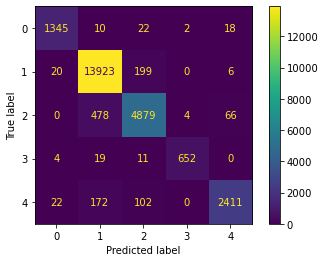

In [115]:
confusion_matrix_plot(model_gb)

# Apply model tuning on RF

In [123]:
params= {'n_estimators': [100,150,220,250],
               'min_samples_split': [2, 5, 7],
               'min_samples_leaf': [1, 2]}

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier(class_weight='balanced')
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=3,verbose=3)
rf_RandomGrid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 150, 220, 250]},
                   scoring='recall', verbose=3)

ACCURACY OF THE MODEL:  0.9986455981941309

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


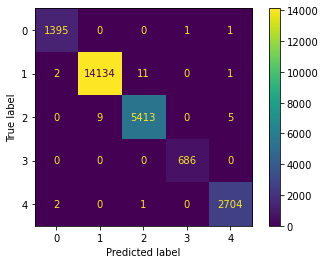

In [129]:
confusion_matrix_plot(rf_RandomGrid)

ACCURACY OF THE MODEL:  0.9990970654627539

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


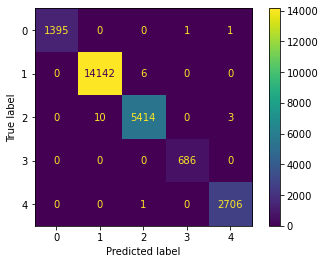

In [127]:
confusion_matrix_plot(classifier3)

# Lets drop some feature

In [194]:
X_train.corr()

,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,hrv_cvsd,hrv_sdnn,hrv_cvnni,hrv_mean_hr,hrv_min_hr,hrv_max_hr,hrv_std_hr,hrv_total_power,hrv_vlf,hrv_lf,hrv_hf,hrv_lf_hf_ratio,hrv_lfnu,hrv_hfnu,hrv_SD1,hrv_SD2,hrv_SD2SD1,hrv_CSI,hrv_CVI,hrv_CSI_Modified,hrv_mean,hrv_std,hrv_min,hrv_max,hrv_ptp,hrv_sum,hrv_energy,hrv_skewness,hrv_kurtosis,hrv_peaks,hrv_rms,hrv_lineintegral,hrv_n_above_mean,hrv_n_below_mean,hrv_n_sign_changes,hrv_iqr,hrv_iqr_5_95,hrv_pct_5,hrv_pct_95,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,Temperature,Humidity,PMV,PDD,Age,X_axis,Y_axis,Z_axis,experiment_Experiment 1,experiment_Experiment 2,experiment_Experiment 3,experiment_Experiment 4,experiment_Experiment 5,experiment_Experiment 6,experiment_Experiment 7,experiment_Experiment 8,Task_Radio,Task_Reading,Task_Typing,Room Color_Green,Room Color_Orange,Room Color_Red,Thermal sensation_hot,Thermal sensation_neutral,Thermal sensation_slightly warm,Thermal sensation_warm,Gender_F,Gender_M
num_ibis,1.000000,-0.028607,0.131841,-0.610864,-0.881772,-0.881786,0.532256,-0.817892,0.938496,-0.771531,-0.843313,-0.870660,-0.827125,-0.243330,0.516714,-0.479458,-0.783282,-0.800907,-0.468734,-0.706962,-0.814652,0.182743,0.164136,-0.164136,-0.881979,-0.836510,0.213759,0.213759,-0.901801,-0.654635,-0.028607,-0.870277,0.487310,-0.502310,-0.610864,0.966914,0.877544,0.174624,0.533670,0.928208,-0.198511,-0.301715,0.917657,0.928926,NaN,-0.745143,-0.868283,0.660230,-0.784967,0.981052,-0.306606,-0.847146,0.071400,0.055476,-0.123344,-0.108630,0.208424,-0.262825,0.078407,-0.102912,-0.150808,-0.195848,0.061755,0.238859,0.198773,0.162635,-0.193290,-0.170484,-0.260278,0.454853,-0.280548,-0.093111,0.026826,0.055476,-0.150808,0.061755,0.026826,0.017242,0.106334,-0.106334
hrv_mean_nni,-0.028607,1.000000,0.944930,-0.075800,-0.097439,-0.097424,0.169819,0.098166,0.062587,0.150547,-0.290956,-0.103999,-0.307773,-0.932582,-0.026295,-0.339354,-0.350741,-0.112140,-0.039375,-0.149869,-0.088754,-0.148867,-0.161912,0.161912,-0.096762,-0.107107,-0.020554,-0.020554,-0.122058,-0.088527,1.000000,-0.104700,0.332542,0.045562,-0.075800,0.212233,0.427131,-0.380405,-0.052589,0.072851,0.978886,-0.171695,0.128890,-0.170375,NaN,-0.127567,-0.060214,0.571162,0.316162,-0.012949,0.018958,-0.318978,0.144781,0.088786,-0.162836,-0.163326,0.111680,0.093832,-0.059787,0.038507,-0.228554,-0.333256,-0.021051,0.014830,0.085897,0.233035,0.066320,0.106755,-0.423223,0.213701,0.132583,-0.258409,0.147913,0.088786,-0.228554,-0.021051,0.147913,0.008325,0.079991,-0.079991
hrv_median_nni,0.131841,0.944930,1.000000,-0.232932,-0.289125,-0.289114,0.290021,-0.005986,0.226314,0.054830,-0.461796,-0.306769,-0.488508,-0.941288,0.143541,-0.339636,-0.454288,-0.307889,-0.206795,-0.324556,-0.260006,-0.154564,-0.168802,0.168802,-0.288505,-0.310035,-0.017283,-0.017283,-0.306507,-0.269147,0.944930,-0.307418,0.340638,-0.130144,-0.232932,0.359707,0.547892,-0.423618,0.018613,0.222363,0.880673,-0.246089,0.325280,-0.066967,NaN,-0.275980,-0.249057,0.617926,0.077137,0.156994,-0.015576,-0.481977,0.167702,0.102141,-0.172093,-0.174430,0.175869,0.047424,-0.064716,0.043935,-0.260270,-0.363567,-0.047527,0.040586,0.107684,0.229211,0.088645,0.118834,-0.469376,0.226094,0.159256,-0.301379,0.174098,0.102141,-0.260270,-0.047527,0.174098,0.020361,0.109245,-0.109245
hrv_range_nni,-0.610864,-0.075800,-0.232932,1.000000,0.737530,0.737543,-0.498005,0.417184,-0.642888,0.374191,0.712268,0.742407,0.713489,0.266161,-0.931650,0.479668,0.589315,0.685003,0.451069,0.605339,0.671164,-0.081738,-0.069266,0.069266,0.737367,0.720674,-0.114021,-0.114021,0.745948,0.592907,-0.075800,0.742481,-0.502461,0.939387,1.000000,-0.626105,-0.593266,0.301216,0.025786,-0.614053,0.072112,0.299213,-0.636780,-0.496406,NaN,0.500322,0.652604,-0.499571,0.587627,-0.636698,0.154813,0.721383,-0.115577,-0.093275,-0.036169,-0.030573,-0.220546,0.205978,-0.014314,0.037705,0.029789,0.090652,0.094332,-0.096900,-0.063650,-0.104001,0.038687,0.026626,0

In [195]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [196]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

46

In [197]:
corr_features

{'Gender_M',
 'Humidity',
 'PDD',
 'Room Color_Red',
 'Thermal sensation_hot',
 'Thermal sensation_neutral',
 'Thermal sensation_slightly warm',
 'hrv_CSI',
 'hrv_CSI_Modified',
 'hrv_CVI',
 'hrv_SD1',
 'hrv_SD2',
 'hrv_cvnni',
 'hrv_cvsd',
 'hrv_energy',
 'hrv_entropy',
 'hrv_hf',
 'hrv_hfnu',
 'hrv_iqr',
 'hrv_iqr_5_95',
 'hrv_lf',
 'hrv_lfnu',
 'hrv_max',
 'hrv_mean',
 'hrv_mean_hr',
 'hrv_median_nni',
 'hrv_min',
 'hrv_min_hr',
 'hrv_n_above_mean',
 'hrv_n_below_mean',
 'hrv_nni_20',
 'hrv_pct_5',
 'hrv_pct_95',
 'hrv_peaks',
 'hrv_pnni_20',
 'hrv_pnni_50',
 'hrv_ptp',
 'hrv_rms',
 'hrv_rmssd',
 'hrv_sdnn',
 'hrv_sdsd',
 'hrv_std',
 'hrv_std_hr',
 'hrv_sum',
 'hrv_svd_entropy',
 'hrv_total_power'}

In [198]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [199]:
X_test

,num_ibis,hrv_mean_nni,hrv_range_nni,hrv_nni_50,hrv_max_hr,hrv_vlf,hrv_lf_hf_ratio,hrv_SD2SD1,hrv_skewness,hrv_kurtosis,hrv_lineintegral,hrv_n_sign_changes,hrv_perm_entropy,Temperature,PMV,Age,X_axis,Y_axis,Z_axis,experiment_Experiment 1,experiment_Experiment 2,experiment_Experiment 3,experiment_Experiment 4,experiment_Experiment 5,experiment_Experiment 6,experiment_Experiment 7,experiment_Experiment 8,Task_Radio,Task_Reading,Task_Typing,Room Color_Green,Room Color_Orange,Thermal sensation_warm,Gender_F
61438,109,798.165138,1562.500,77.0,182.857143,2347.009718,1.352453,1.223925,0.981334,2.672529,22406.250,0,0.999743,32,1.84,20,45.81250,4.12500,-43.03125,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
46647,108,769.097222,1218.750,74.0,174.545455,12972.281590,1.100818,2.009448,0.672838,0.077992,18343.750,0,0.996792,25,1.87,20,40.09375,-51.18750,-14.50000,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
36827,215,878.125000,500.000,118.0,96.000000,906.201723,0.718560,1.341373,-0.260260,0.475295,16781.250,0,0.992218,32,1.84,20,61.31250,4.43750,-22.31250,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
19721,164,680.735518,1093.750,117.0,192.000000,2759.112435,0.563702,1.188040,1.322380,2.095375,28578.125,0,0.998636,25,1.87,20,-17.50000,55.87500,11.15625,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
40348,69,939.538043,1484.375,54.0,160.000000,13749.517850,0.758788,1.522818,0.828181,-0.251982,20203.125,0,1.000000,27,0.56,20,22.93750,0.12500,59.96875,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24231,184,803.074049,1046.875,102.0,147.692308,1445.969137,0.647266,1.337230,1.430417,4.151578,21296.875,0,0.997334,25,0.06,20,-58.81250,-9.06250,-17.18750,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
15602,264,802.675189,765.625,114.0,137.142857,642.488045,0.874363,1.397457,0.057444,4.136004,18562.500,0,0.996174,32,1.84,20,-53.40625,-13.28125,37.31250,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
32085,129,868.217054,1156.250,87.0,137.142857,1929.479807,0.772280,1.277128,0.750523,0.656012,24609.375,0,0.998364,27,0.66,30,-23.59375,12.00000,51.75000,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
39449,304,770.610609,750.000,90.0,112.941176,612.668822,0.892483,1.422618,1.309950,6.004038,17421.875,0,0.998208,32,1.84,20,-47.90625,24.87500,-34.68750,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [200]:
classifier_corr=RandomForestClassifier(class_weight='balanced')
classifier_corr.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

ACCURACY OF THE MODEL:  0.998481428278268

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1397
           1       1.00      1.00      1.00     14148
           2       1.00      1.00      1.00      5427
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00      2707

    accuracy                           1.00     24365
   macro avg       1.00      1.00      1.00     24365
weighted avg       1.00      1.00      1.00     24365



C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


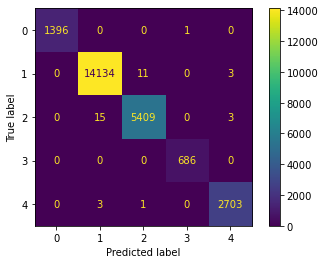

In [201]:
confusion_matrix_plot(classifier_corr)

In [203]:
test= pd.read_csv(r"D:\AAA HEATSTROKE\Processed data\test_data_processed.csv")
test.drop(['Personal Thermal Assessment'],axis=1,inplace=True)
test.drop(corr_features,axis=1,inplace=True)
predicted_class=classifier_corr.predict(test)
df_test=pd.read_csv(r"D:\AAA HEATSTROKE\new data\Test Data\Test Data.csv")
#predicted_class=model.predict(test)
submission=pd.DataFrame({"subject":df_test['subject'],"datetime":df_test['datetime'],"Personal Thermal Assessment":np.squeeze(predicted_class)})
submission['Personal Thermal Assessment']= submission['Personal Thermal Assessment'].replace([0,1,2,3,4],['hot', 'neutral', 'slightly warm', 'very hot', 'warm'] )
submission   

,subject,datetime,Personal Thermal Assessment
0,Matuo,2021-07-27 05:14:00+00:00,neutral
1,Matuo,2021-07-27 05:14:01+00:00,neutral
2,Matuo,2021-07-27 05:14:02+00:00,neutral
3,Matuo,2021-07-27 05:14:03+00:00,neutral
4,Matuo,2021-07-27 05:14:04+00:00,neutral
...,...,...,...
35692,Yuke,2021-07-28 03:19:54+00:00,slightly warm
35693,Yuke,2021-07-28 03:19:55+00:00,slightly warm
35694,Yuke,2021-07-28 03:19:56+00:00,hot
35695,Yuke,2021-07-28 03:19:57+00:00,slightly warm


In [204]:
submission['Personal Thermal Assessment'].value_counts()

neutral          25471
slightly warm     7144
warm              1503
hot               1067
very hot           512
Name: Personal Thermal Assessment, dtype: int64